Basic analytics of bounding box ontopic replies data sets (repliers only and both repliers and replied tos)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from collections import Counter

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_oneSide=pd.read_csv('bbContextOntopicRepliesOnlyDF.csv',sep=';')

In [4]:
df_oneSide.columns

Index([u'id', u'username', u'user_id', u'geo_enabled', u'followCount',
       u'friendCount', u'faveCount', u'tweetCount', u'date', u'timing',
       u'coordinates', u'location', u'source', u'retweetCount', u'isRetweet',
       u'origTweet', u'origUser', u'origTime', u'origPlace',
       u'origUserCreated', u'contributors', u'hashtags', u'has_media', u'urls',
       u'mentions', u'replyWho', u'replyWhat', u'text'],
      dtype='object')

In [56]:
df_oneSide['dateObj']=pd.to_datetime(df_oneSide.date)

In [57]:
replies=df_oneSide[df_oneSide.replyWho!='0']

In [7]:
len(replies)

562512

So more than a quarter of these tweets are replies

In [8]:
grouped=df_oneSide.groupby('user_id')

In [31]:
df_oneSide['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

In [32]:
freq=Counter(df_oneSide.secDiff.dropna())

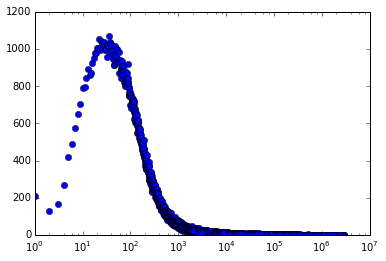

In [33]:
plt.semilogx(freq.keys(),freq.values(),'ob')

In [36]:
tweetNum=grouped.size()

In [39]:
tweetDist=Counter(tweetNum.values)

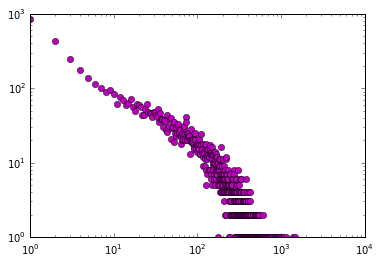

In [41]:
plt.loglog(tweetDist.keys(), tweetDist.values(), 'mo')

# Get the distribution of number of replies per user

In [13]:
freq=replies.groupby(replies.user_id).size()

In [14]:
len(freq)

7205

(array([  2.65800000e+03,   7.82000000e+02,   5.41000000e+02,
          4.40000000e+02,   3.85000000e+02,   2.94000000e+02,
          2.70000000e+02,   2.34000000e+02,   1.65000000e+02,
          1.76000000e+02,   1.51000000e+02,   1.31000000e+02,
          1.08000000e+02,   9.00000000e+01,   8.70000000e+01,
          8.50000000e+01,   5.50000000e+01,   5.70000000e+01,
          6.50000000e+01,   4.30000000e+01,   4.60000000e+01,
          3.60000000e+01,   4.10000000e+01,   2.40000000e+01,
          3.20000000e+01,   2.80000000e+01,   1.90000000e+01,
          1.90000000e+01,   1.40000000e+01,   1.60000000e+01,
          5.00000000e+00,   1.20000000e+01,   9.00000000e+00,
          1.00000000e+01,   7.00000000e+00,   8.00000000e+00,
          8.00000000e+00,   8.00000000e+00,   7.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
        

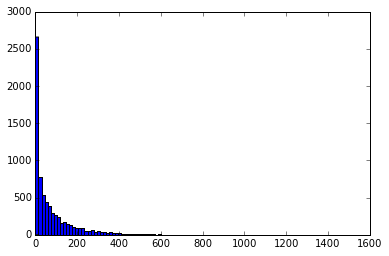

In [15]:
plt.hist(freq.values,100)

In [16]:
f=Counter(freq.values)

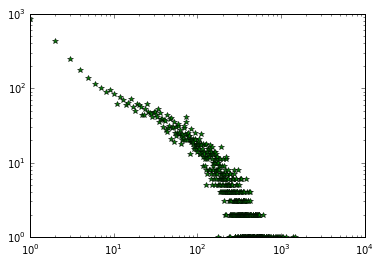

In [35]:
plt.loglog(f.keys(),f.values(),'g*')

In [18]:
grouped=replies.groupby('user_id')

In [42]:
replies['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

-c:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
freq=Counter(replies.secDiff.dropna())

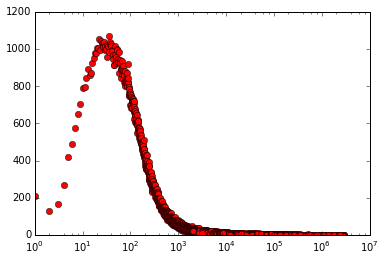

In [44]:
plt.semilogx(freq.keys(), freq.values(),'ro')

In [47]:
len(replies[~replies.secDiff.isnull()])/float(len(replies))

0.987191384361578

In [54]:
len((replies.user_id[~replies.secDiff.isnull()]).unique())/float(len(replies.user_id.unique()))

0.8803608605135322

So only 2% of tweets are missed, but 12% of the users don't have more than one reply